Titanic Analysis:

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt 
%config IlineBackend.figure_format = "svg"

Explanation: stands for import needed libraries for data manipulation and visualization.

Read data from CSV file:

In [30]:
df = pd.read_csv("/Users/baiweile/Downloads/titanic 1.csv")

Explanation: stands for reading a CSV file, using the path of CSV file in out computer.

Inspect data: Structure 

1. General structure of CSV file

In [31]:
df.shape

(891, 12)

Explanation: stands for reflection of structure of the data in CSV file. It contain 891 rows and 12 columns. 

2. Display first 5 rows

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Explanation: stands for print first 5 rows. Help to see that our data has missing values or if out data has right data types inside.

3. Information about the columns and their data types

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Explanation: stands for showing information about total amount of columns (12) and their types: float, int or object. Non-Null count stands for non missed values in data set. 

 Inspect data: Values

In [34]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Explanation: Showing the count of each column with its values. Count stands for fulfilled values in data set, mean means average value of each column, std means standard deviation, min stands for minimum value in each column, 25-50-75% stands for values below which 25, 50 or 75 percent of data falls, max stands for maximum value in each column. 

Data Cleaning: 

1. Identification of missing values 

In [35]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Explanation: We can see all columns where have missing values (Age, Cabin, Embarked), now we need to and analyze which data makes sense for analysis and should be filled in and which can be dropped. 

2. Filling of misssing values 

2.1 Handle missing velues in "Age" column with median

In [36]:
df2 = df.copy()
median_age = df2["Age"].median()
df2["Age"] = df2["Age"].fillna(median_age)

Explanation: As long as age is an important and valuable data and it is represented in numbers we can fill it with average age value. 

2.2 Handle missing values in "Embarked" with most common value

In [37]:
avarage_embarked = df2["Embarked"].mode()[0]
df2["Embarked"] = df2["Embarked"].fillna(avarage_embarked)

Explanation: Embarked column has only 2 missing values, this column stands for port where people went onboard. We can replace this two data with most common values. 

3. Additional data cleaning steps 

3.1 Drop missing values in "Cabin" column 

In [38]:
df3 = df2.copy()
df3 = df3.dropna()

Explanation: Some missing values were handled before (“Age” and “Embarked”), but column “Cabin” had 687 missed values in total 891 rows, which is too much. To drop those rows makes analysis of data easier and more accurate, rather than to fulfil missed values. Screenshot demonstrates first and last 10 rows data set and shows that NaN values in “Cabin” column were dropped. 

Data Analysis:

1. Count of passengers by gender

In [39]:
df[["Sex","PassengerId"]].groupby(["Sex"]).count()

,PassengerId
Sex,
female,314
male,577


Explanation: This tells the computer to look at the “Sex” and “PassengerId” columns, to put them into groups based on whether a person is male or female, and in the end to count how many people are in each group.

2. Computing the avarage age of passangers 

In [40]:
avarage_age = df3["Age"].mean()
print(int(avarage_age))

35


Explanation: Using column with data about age we have used, “mean” calculates the average number of the values in the selected series. Average age is 35. 

3. Computing survival rate by passenger class

In [41]:
survival_rate = df[["Pclass", "Survived"]].groupby(["Pclass"]).mean()
print(survival_rate)

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


Explanation: This tells the computer to look at the “Pclass” and “Survived” columns, to put them into groups based on counting avarge rate (mean) of survival depending from passanger class.  

Data Visualization:

1. Bar chart to visualize the survival rate by passenger class

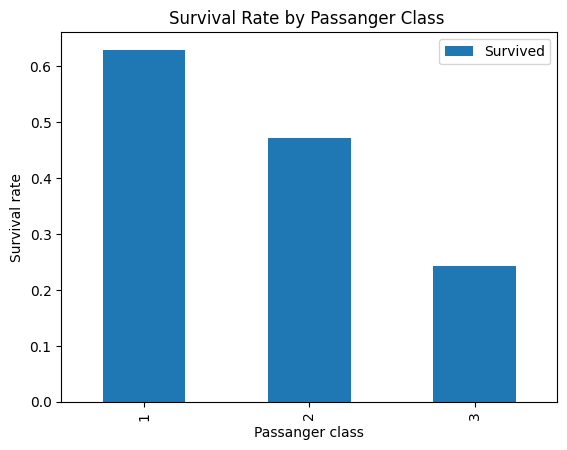

In [42]:
survival_rate.plot.bar()
plt.title("Survival Rate by Passanger Class ") 
plt.xlabel("Passanger class")
plt.ylabel("Survival rate")
plt.show()

Explanation: By using matplotlib.pyplot was created a bar chart which reflecting linear relatioship between class of passanger(x-axis) and survival rate (y-asis). The highest rate of survival had passangers of 1st class, and the most low passangers of 3rd.

Conclusion:

1. Summarize your findings or insights gained from analyzing the Titanic dataset.


Provided data set helped to investigate some statistic due Titanic ship crush. After preparation and cleaning data it is possible to make few conclusions: 

* An average age of Titanic passenger not depending from gender was 35 years;
* The amount of male passengers was leading: 577, when female total count was 314;
* A ratio of passenger’ class to the probability of survival showed a linear relationship, which illustrated in chart bar. The highest rate of survival belongs to passengers of 1-st class, when the lowest to passengers of 3-rd;


2. Reflect on the importance of data cleaning and exploration in data analysis.

Cleaning and exploration of data in data analysis firstly stands for accuracy of investigation. Cleaning data process helps to search for missing values, errors in data sets (for example if in one column we have data represented in floats, integers, and strings values all together), those mistakes make data analysis unrealistic, their identification helps to make more objective result, due to most realistic condition of things. Good cleaned and organized data is more convenient for next usage, especially if it should be used by another person or as part of any kind of report. By exploring the data analysts can identify trends, relationships, depressions, or anomalies based on past data and build predictions for future events, which helps to take strategical decisions.